자체 데이터셋 평가

# GPU 할당

In [3]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 필요한 라이브러리 로드

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 모델 로드

In [ ]:
## 모델 로드
# model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
# model = load_model(model_path)

In [6]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

# 건축물 데이터셋

In [7]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)/real"

In [8]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 48, Real: 28


Found 76 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741862611.525449  562474 service.cc:146] XLA service 0x7cbb90002ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741862611.525490  562474 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2025-03-13 19:43:31.744287: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-13 19:43:32.815126: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
202

 7/76 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 

I0000 00:00:1741862621.422385  562474 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step
[[0.60824794]
 [0.749865  ]
 [0.5356135 ]
 [0.2115498 ]
 [0.30523756]
 [0.801304  ]
 [0.00689299]
 [0.46853656]
 [0.360465  ]
 [0.00247219]
 [0.07425108]
 [0.00494856]
 [0.25952086]
 [0.0579601 ]
 [0.62526083]
 [0.8722406 ]
 [0.39622062]
 [0.38375944]
 [0.48982736]
 [0.02830949]
 [0.04274753]
 [0.02263529]
 [0.01448666]
 [0.09923631]
 [0.12939471]
 [0.2882686 ]
 [0.02361234]
 [0.02274284]
 [0.02723315]
 [0.01545613]
 [0.26124513]
 [0.01975201]
 [0.09495848]
 [0.02084322]
 [0.12492914]
 [0.27243716]
 [0.00247996]
 [0.7620145 ]
 [0.11647148]
 [0.01134446]
 [0.3366702 ]
 [0.01772027]
 [0.35543677]
 [0.04430676]
 [0.1537461 ]
 [0.1537461 ]
 [0.18558358]
 [0.18558358]
 [0.4502174 ]
 [0.65566087]
 [0.01717927]
 [0.6431168 ]
 [0.5655901 ]
 [0.3422853 ]
 [0.13312784]
 [0.9530539 ]
 [0.7404975 ]
 [0.41543376]
 [0.07134389]
 [0.32346126]
 [0.97691363]
 [0.23814538]
 [0.5004397 ]
 [0.8794724 ]
 [0.8900156 ]
 [0.9332532 ]
 [0.79706085]
 [0.74127793]
 [0.804

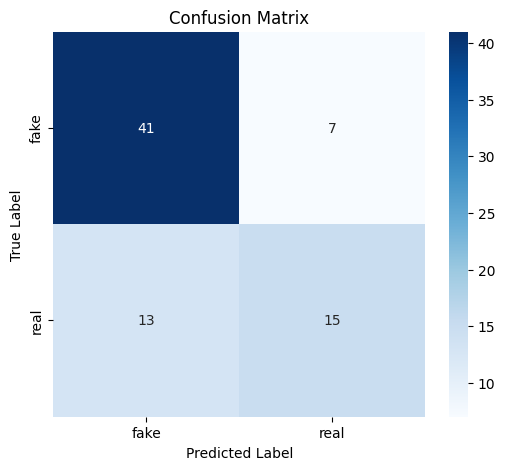


Classification Report:
              precision    recall  f1-score   support

        fake       0.76      0.85      0.80        48
        real       0.68      0.54      0.60        28

    accuracy                           0.74        76
   macro avg       0.72      0.69      0.70        76
weighted avg       0.73      0.74      0.73        76



In [9]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 동물

In [10]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물/real"

In [11]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 51, Real: 22


Found 73 images belonging to 2 classes.


 3/73 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
[[4.8505110e-04]
 [4.3694045e-02]
 [7.9696532e-04]
 [8.2379319e-03]
 [1.2852296e-02]
 [2.1001302e-02]
 [1.3520205e-03]
 [1.5795514e-02]
 [1.8647544e-02]
 [5.6195998e-01]
 [1.4711472e-01]
 [3.0176884e-02]
 [1.0329348e-01]
 [1.6118642e-02]
 [2.0710506e-02]
 [3.3321254e-02]
 [1.5612921e-02]
 [1.6913430e-01]
 [5.8510307e-02]
 [4.6580130e-01]
 [1.7903616e-01]
 [1.7195678e-01]
 [1.3033941e-02]
 [8.3412424e-02]
 [7.0905131e-01]
 [9.2530817e-02]
 [1.7736059e-01]
 [2.3008429e-02]
 [4.1105755e-02]
 [5.5738509e-01]
 [1.7938437e-01]
 [2.4305521e-01]
 [2.4305521e-01]
 [9.9108532e-02]
 [2.1254869e-01]
 [9.8638654e-01]
 [9.4383997e-01]
 [7.2847241e-01]
 [1.6945210e-01]
 [5.3028256e-01]
 [2.0830281e-02]
 [6.8183742e-02]
 [6.5732427e-02]
 [1.3420979e-02]
 [1.9025298e-02]
 [1.1415825e-02]
 [2.5030036e-02]
 [3.5453153e-01]
 [4.0225707e-02]
 [2.2017814e-02]
 [3.7941869e-02]
 [8.6468798e-01]
 [9.9743998e-01]
 [8.8039273e-01]
 [8.6143416e-01]
 [8.6721528e-01]
 [2.0174

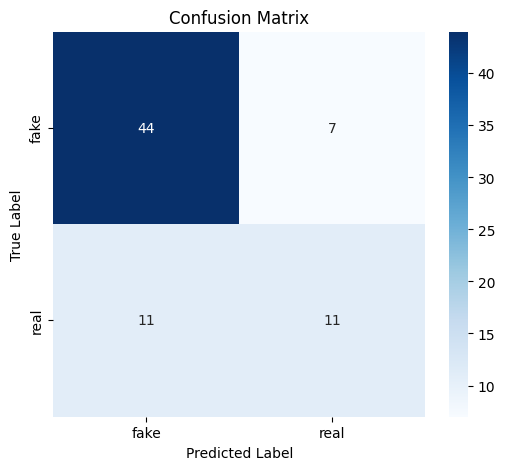


Classification Report:
              precision    recall  f1-score   support

        fake       0.80      0.86      0.83        51
        real       0.61      0.50      0.55        22

    accuracy                           0.75        73
   macro avg       0.71      0.68      0.69        73
weighted avg       0.74      0.75      0.75        73



In [12]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 사물

In [14]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물/real"

In [15]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 40, Real: 29


Found 68 images belonging to 2 classes.


 4/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
[[2.66284227e-01]
 [4.03337091e-01]
 [3.03686768e-01]
 [1.50989637e-01]
 [8.52264464e-04]
 [5.45207202e-01]
 [2.62604319e-02]
 [2.89793015e-01]
 [1.72091708e-01]
 [1.72563776e-01]
 [1.97552927e-02]
 [2.51764134e-02]
 [9.05977096e-03]
 [1.29664056e-02]
 [2.95888335e-01]
 [4.59780172e-02]
 [2.36416087e-01]
 [2.00132579e-01]
 [2.79444128e-01]
 [1.46687061e-01]
 [1.07616685e-01]
 [2.09682405e-01]
 [1.71548337e-01]
 [4.29126294e-03]
 [1.27178757e-02]
 [1.05466368e-02]
 [1.60528999e-02]
 [3.59403491e-02]
 [5.56511395e-02]
 [9.52477753e-02]
 [1.51824251e-01]
 [3.85381132e-01]
 [2.67801546e-02]
 [3.40938449e-01]
 [3.19320038e-02]
 [1.46398908e-02]
 [4.89672333e-01]
 [3.15520763e-01]
 [3.00887585e-01]
 [7.50762165e-01]
 [5.06462753e-01]
 [1.35546073e-01]
 [1.37634203e-01]
 [9.89058763e-02]
 [2.09933072e-01]
 [1.51004508e-01]
 [9.04187486e-02]
 [2.34385412e-02]
 [4.23293620e-01]
 [2.86332853e-02]
 [5.74392863e-02]
 [3.04107964e-01]
 [8.98527503e-01]
 [5.52

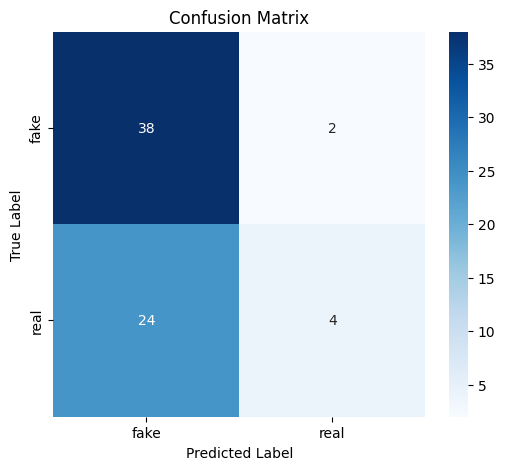


Classification Report:
              precision    recall  f1-score   support

        fake       0.61      0.95      0.75        40
        real       0.67      0.14      0.24        28

    accuracy                           0.62        68
   macro avg       0.64      0.55      0.49        68
weighted avg       0.64      0.62      0.54        68



In [16]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 실내공간

In [17]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간/real"

In [18]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 16, Real: 6


Found 21 images belonging to 2 classes.


 4/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[4.45649177e-02]
 [1.49876237e-01]
 [1.13558963e-01]
 [5.25118947e-01]
 [5.25118947e-01]
 [2.96619922e-01]
 [2.96619922e-01]
 [1.93718582e-01]
 [1.42837822e-01]
 [2.19244626e-04]
 [2.06597120e-04]
 [4.36638715e-04]
 [1.04438564e-04]
 [6.25865981e-02]
 [4.31542844e-02]
 [3.21864933e-02]
 [4.00450110e-01]
 [7.36150026e-01]
 [7.23581016e-01]
 [5.22228517e-03]
 [5.22228517e-03]]
Model Accuracy: 0.7619


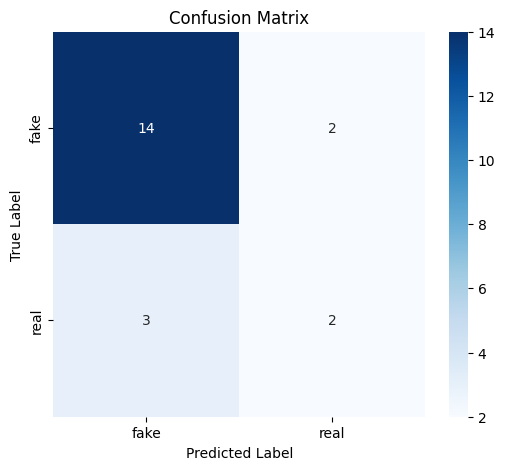


Classification Report:
              precision    recall  f1-score   support

        fake       0.82      0.88      0.85        16
        real       0.50      0.40      0.44         5

    accuracy                           0.76        21
   macro avg       0.66      0.64      0.65        21
weighted avg       0.75      0.76      0.75        21



In [19]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 음식

In [26]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 76, Real: 28


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식/real"

In [22]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 76, Real: 28


In [24]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

Found 101 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step
[[4.4928783e-01]
 [5.9139591e-01]
 [6.2519598e-01]
 [5.1493150e-01]
 [1.7961907e-01]
 [1.0925381e-01]
 [5.2853346e-02]
 [1.5250463e-03]
 [4.6051230e-02]
 [9.5115177e-04]
 [2.6301482e-01]
 [3.0625774e-02]
 [1.6172566e-01]
 [1.4591622e-01]
 [1.3481404e-01]
 [3.5559889e-02]
 [2.3532003e-02]
 [2.1686883e-01]
 [3.0295290e-02]
 [1.7704315e-01]
 [3.9527077e-02]
 [9.1965050e-03]
 [5.8545146e-02]
 [3.9527077e-02]
 [7.0362665e-02]
 [5.4195050e-02]
 [1.1603089e-01]
 [5.5054444e-01]
 [2.6204200e-02]
 [6.4271368e-02]
 [2.2963825e-01]
 [6.4852989e-01]
 [9.3069337e-03]
 [1.1773265e-01]
 [4.9464859e-02]
 [3.1893533e-02]
 [3.7816113e-01]
 [3.7816113e-01]
 [3.1345498e-02]
 [2.8669875e-02]
 [1.1115538e-01]
 [7.7453561e-02]
 [2.1021336e-01]
 [6.0560339e-04]
 [6.6305307e-04]
 [3.3223438e-01]
 [4.1079432e-02]
 [2.1266583e-02]
 [5.5660728e-02]
 [2.2574160e-02]
 [4.2404611e-02]
 [2.1328014e-01]
 [4.3008029e-01]
 [1.6103053e-01]
 [3.5415307e-01]
 [6.0094461e-02]
 [4.5

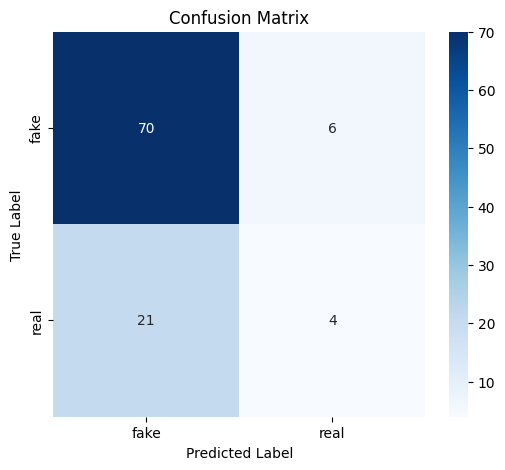


Classification Report:
              precision    recall  f1-score   support

        fake       0.77      0.92      0.84        76
        real       0.40      0.16      0.23        25

    accuracy                           0.73       101
   macro avg       0.58      0.54      0.53       101
weighted avg       0.68      0.73      0.69       101



In [25]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 인물

In [27]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 6, Real: 4


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물/real"

In [29]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 6, Real: 4


In [30]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

Found 10 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step
[[0.05790767]
 [0.84691805]
 [0.8986482 ]
 [0.9211959 ]
 [0.93965   ]
 [0.03244559]
 [0.9769339 ]
 [0.2138729 ]
 [0.18801387]
 [0.9538474 ]]
Model Accuracy: 0.4000


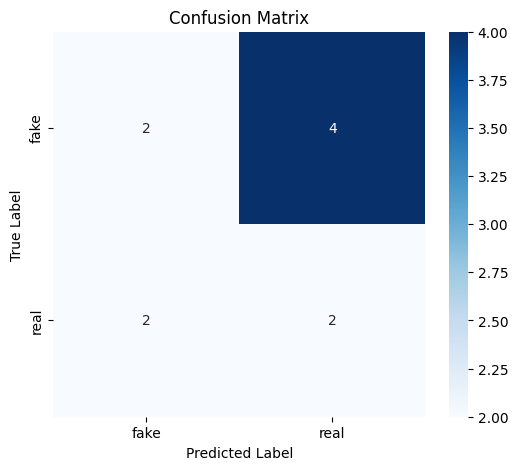


Classification Report:
              precision    recall  f1-score   support

        fake       0.50      0.33      0.40         6
        real       0.33      0.50      0.40         4

    accuracy                           0.40        10
   macro avg       0.42      0.42      0.40        10
weighted avg       0.43      0.40      0.40        10



In [31]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 풍경

In [32]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 90, Real: 42


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)/real"

In [33]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 90, Real: 42


In [34]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

Found 122 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step
[[0.14052881]
 [0.8386706 ]
 [0.19803199]
 [0.42645925]
 [0.86892545]
 [0.26665494]
 [0.1492503 ]
 [0.9026742 ]
 [0.808254  ]
 [0.9676425 ]
 [0.41111755]
 [0.69850236]
 [0.7947111 ]
 [0.7400158 ]
 [0.83084095]
 [0.80873746]
 [0.96858764]
 [0.6569693 ]
 [0.8679257 ]
 [0.97333366]
 [0.7146714 ]
 [0.5627921 ]
 [0.12988645]
 [0.935108  ]
 [0.93391305]
 [0.8163633 ]
 [0.30149138]
 [0.80136716]
 [0.61903596]
 [0.7122535 ]
 [0.84982157]
 [0.3059315 ]
 [0.9646653 ]
 [0.00248966]
 [0.8563525 ]
 [0.3012574 ]
 [0.14031024]
 [0.5651302 ]
 [0.20994988]
 [0.00933128]
 [0.09471034]
 [0.03378855]
 [0.08117491]
 [0.16502646]
 [0.10066283]
 [0.10063308]
 [0.4412128 ]
 [0.6316744 ]
 [0.5669365 ]
 [0.2949048 ]
 [0.18881384]
 [0.02168618]
 [0.01725116]
 [0.04597682]
 [0.64261526]
 [0.1016432 ]
 [0.03613789]
 [0.19753774]
 [0.02829029]
 [0.64026165]
 [0.13783951]
 [0.26502448]
 [0.01448464]
 [0.10759628]
 [0.02424892]
 [0.16457982]
 [0.24024177]
 [0.5596078 ]
 [0.2

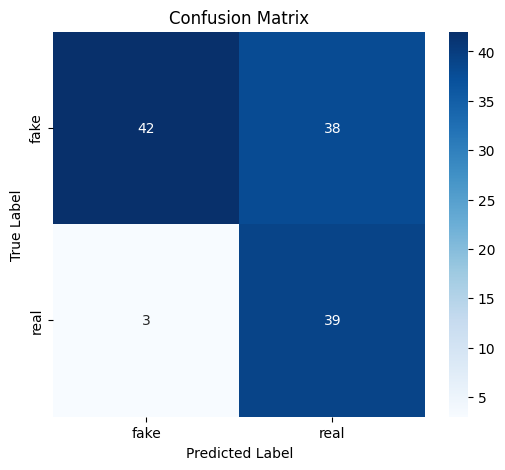


Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.53      0.67        80
        real       0.51      0.93      0.66        42

    accuracy                           0.66       122
   macro avg       0.72      0.73      0.66       122
weighted avg       0.79      0.66      0.67       122



In [35]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 풍경화

In [36]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 111, Real: 0


In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)/real"

In [38]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 111, Real: 0


In [40]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

Found 92 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
[[0.0272081 ]
 [0.36922777]
 [0.02102146]
 [0.650875  ]
 [0.11439946]
 [0.41949216]
 [0.30771512]
 [0.41709152]
 [0.02535986]
 [0.10556185]
 [0.04752468]
 [0.04076263]
 [0.74020964]
 [0.02064686]
 [0.52682394]
 [0.03161431]
 [0.28884035]
 [0.04418907]
 [0.4996424 ]
 [0.06076394]
 [0.05320615]
 [0.06380723]
 [0.296295  ]
 [0.18207482]
 [0.3928727 ]
 [0.43317136]
 [0.23917225]
 [0.02387947]
 [0.05789607]
 [0.54119325]
 [0.00830407]
 [0.22086371]
 [0.8093245 ]
 [0.12290834]
 [0.13745977]
 [0.22937894]
 [0.36298367]
 [0.6742821 ]
 [0.420887  ]
 [0.7847959 ]
 [0.07551434]
 [0.7283428 ]
 [0.04644058]
 [0.73054373]
 [0.09591634]
 [0.32954225]
 [0.01186997]
 [0.2452351 ]
 [0.5545151 ]
 [0.81475365]
 [0.55993223]
 [0.41754594]
 [0.5802381 ]
 [0.8057203 ]
 [0.05747326]
 [0.24455805]
 [0.20149222]
 [0.28167653]
 [0.28642413]
 [0.52251315]
 [0.9251755 ]
 [0.3585117 ]
 [0.5124089 ]
 [0.06452191]
 [0.10435513]
 [0.026746  ]
 [0.09683064]
 [0.35712868]
 [0.722

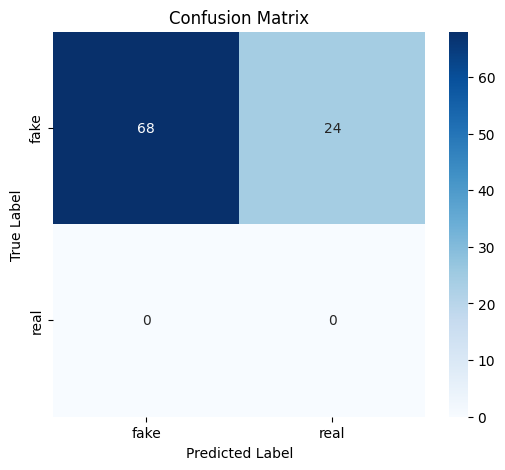


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.74      0.85        92
        real       0.00      0.00      0.00         0

    accuracy                           0.74        92
   macro avg       0.50      0.37      0.42        92
weighted avg       1.00      0.74      0.85        92



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [41]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 흑백사진

In [42]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 11, Real: 3


In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진/real"

In [44]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 11, Real: 3


In [45]:

# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

Found 14 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step
[[0.13786808]
 [0.0434328 ]
 [0.02737618]
 [0.01243809]
 [0.02282736]
 [0.00862113]
 [0.07477557]
 [0.0876234 ]
 [0.11998044]
 [0.08772662]
 [0.06521602]
 [0.26215705]
 [0.18009502]
 [0.8882809 ]]
Model Accuracy: 0.8571


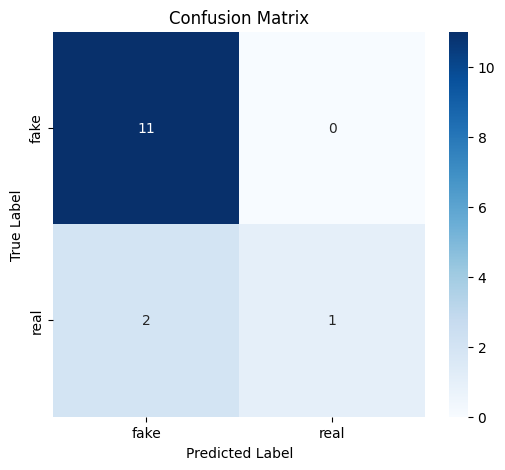


Classification Report:
              precision    recall  f1-score   support

        fake       0.85      1.00      0.92        11
        real       1.00      0.33      0.50         3

    accuracy                           0.86        14
   macro avg       0.92      0.67      0.71        14
weighted avg       0.88      0.86      0.83        14



In [46]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
